In [1]:
from tabulate import tabulate
member_name = [

    ["CHAN SOPHARA", "Male", "Y3-AMS", "e20211081"],
    ["CHHORN SOLITA", "Female", "Y3-AMS", "e20210537"],
    ["HUON SITHAI", "Male", "Y3-AMS", "e20210954"],
    ["EN SREYTHOM", "Female", "Y3-AMS", " e20210084"],


]
member_info = ["Name", "Gender", "Program", "ID"]
print("Group 5.Project 5.ML:")
print(tabulate(member_name, headers=member_info, tablefmt="fancy_grid"))

Group 5.Project 5.ML:
╒═══════════════╤══════════╤═══════════╤═══════════╕
│ Name          │ Gender   │ Program   │ ID        │
╞═══════════════╪══════════╪═══════════╪═══════════╡
│ CHAN SOPHARA  │ Male     │ Y3-AMS    │ e20211081 │
├───────────────┼──────────┼───────────┼───────────┤
│ CHHORN SOLITA │ Female   │ Y3-AMS    │ e20210537 │
├───────────────┼──────────┼───────────┼───────────┤
│ HUON SITHAI   │ Male     │ Y3-AMS    │ e20210954 │
├───────────────┼──────────┼───────────┼───────────┤
│ EN SREYTHOM   │ Female   │ Y3-AMS    │ e20210084 │
╘═══════════════╧══════════╧═══════════╧═══════════╛


### Import Library

In [2]:
# Importing important libraries that help our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


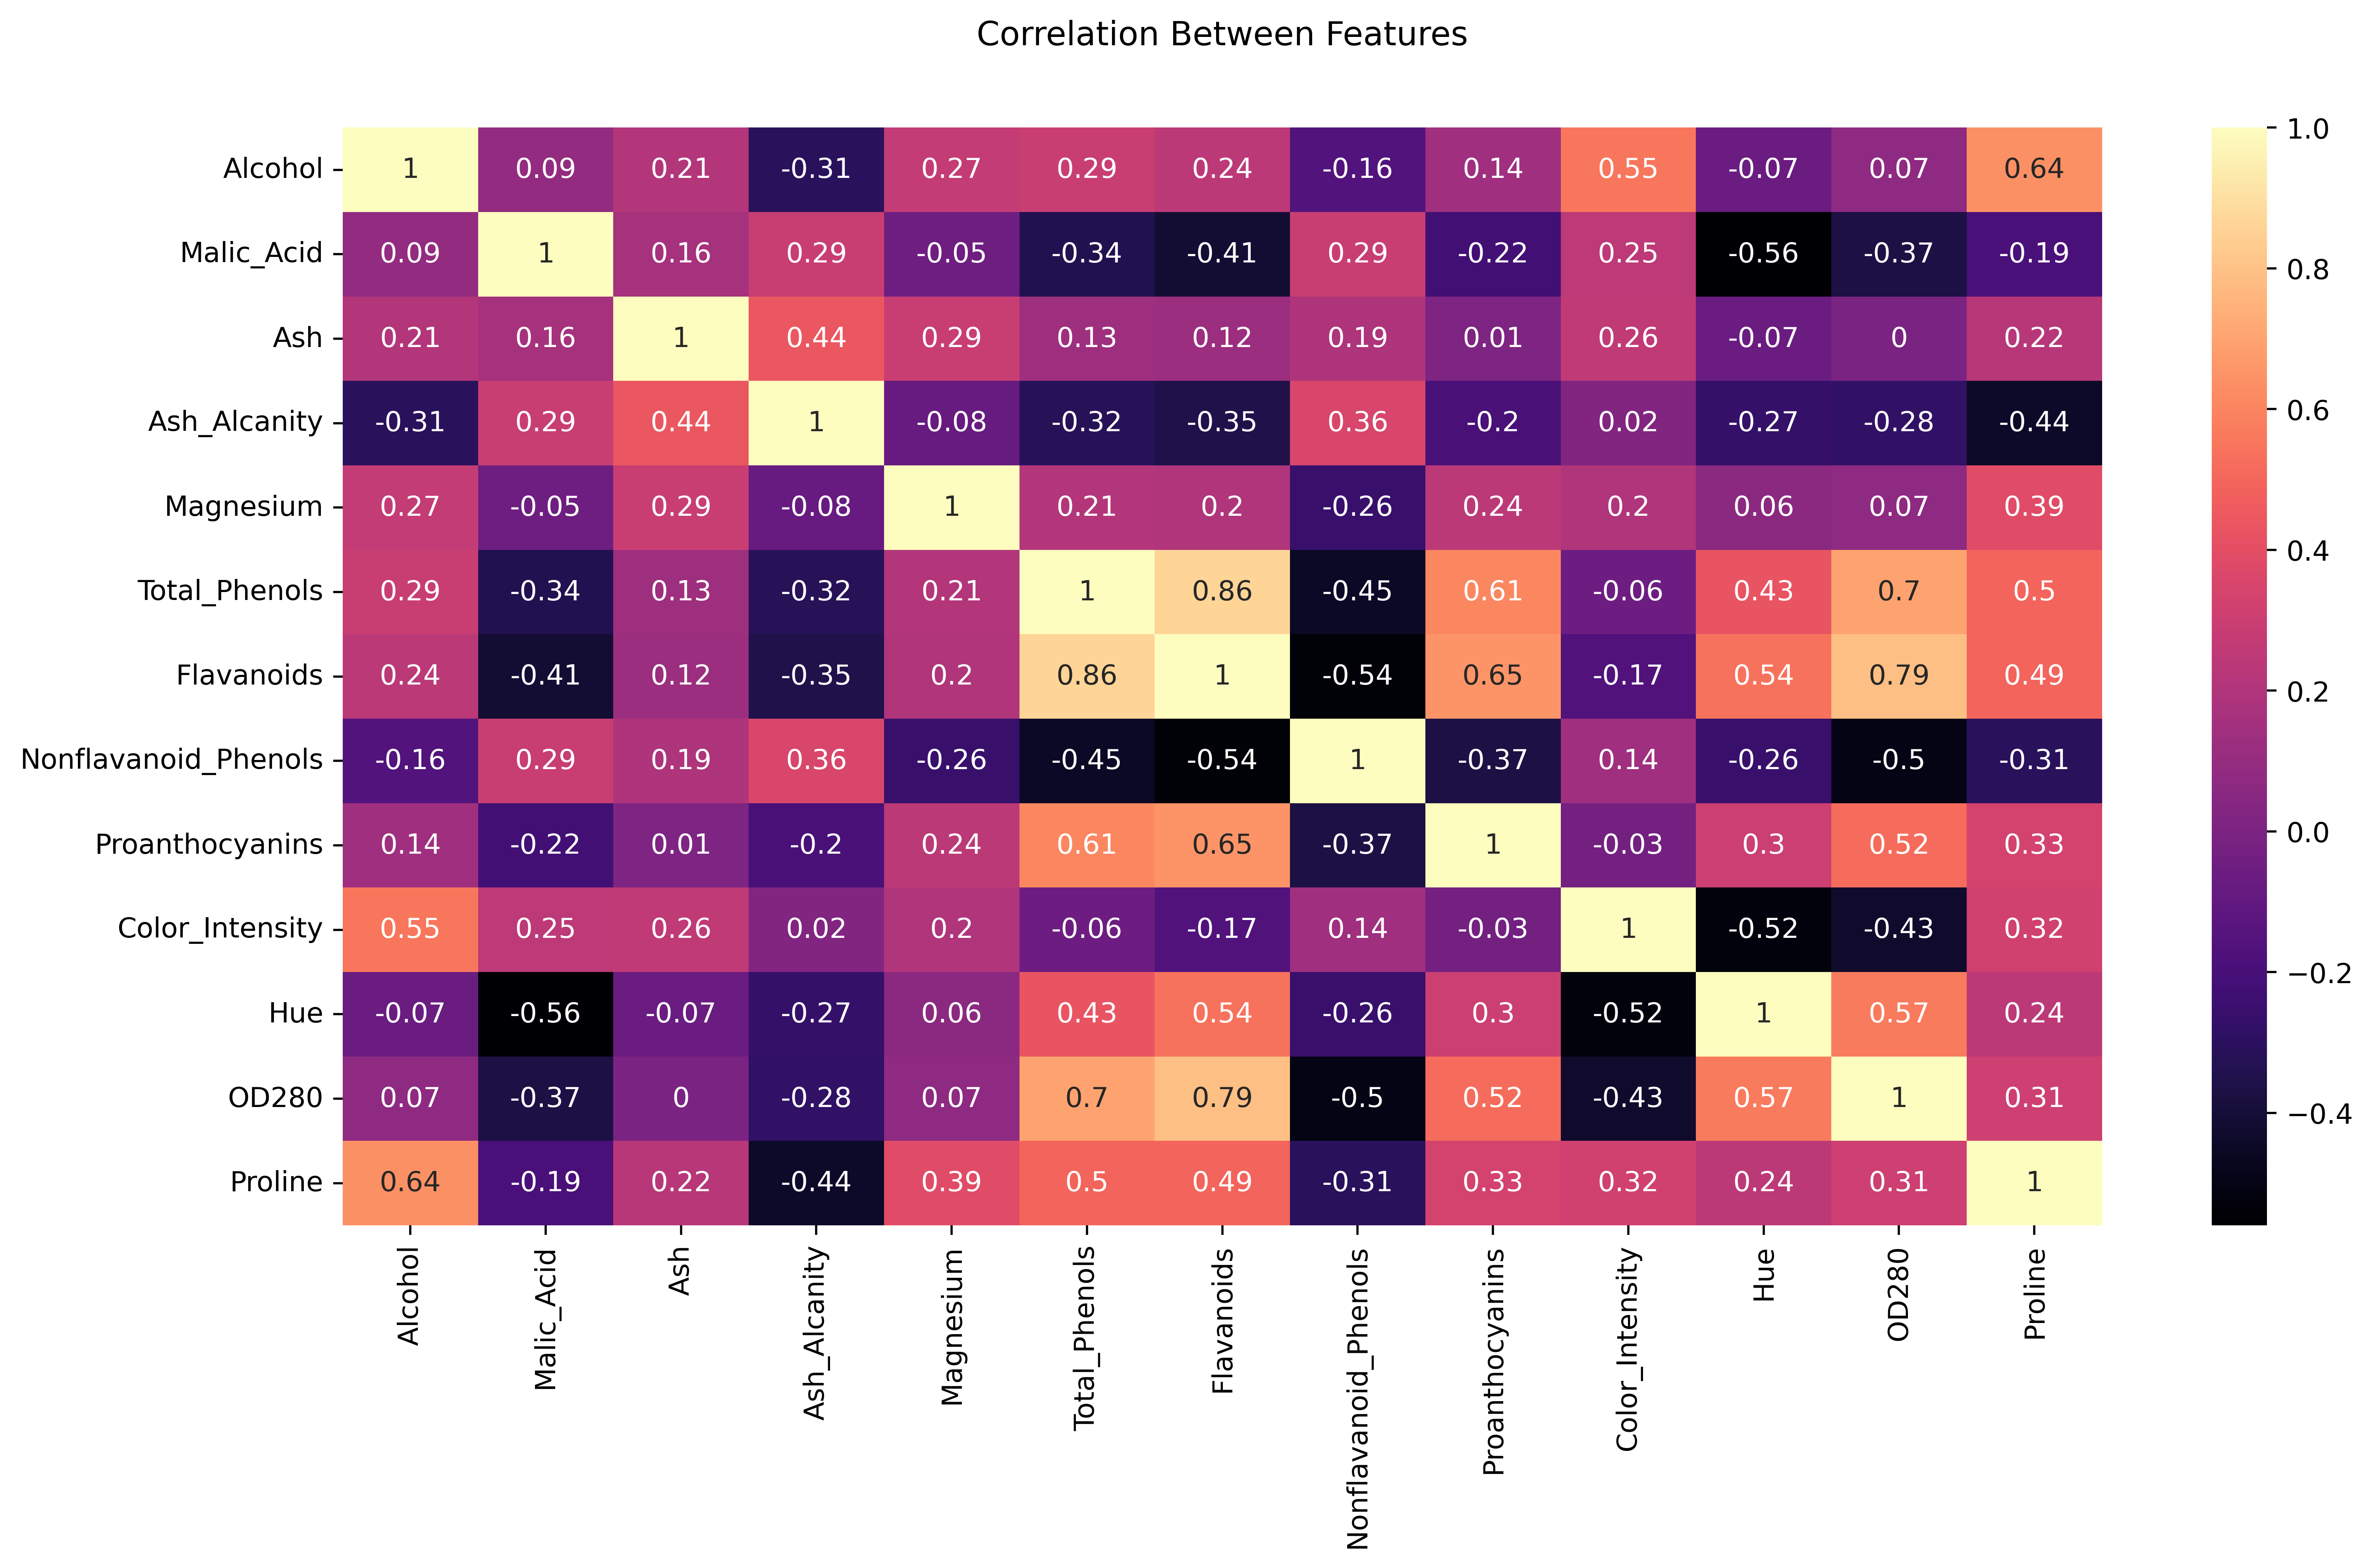

In [8]:
# Correlation between features
plt.figure(figsize=(13,8), dpi=500)
sns.heatmap(round(df.corr(),2), annot=True, cmap='magma')
plt.title("Correlation Between Features", pad=30)
plt.tight_layout()
plt.show()

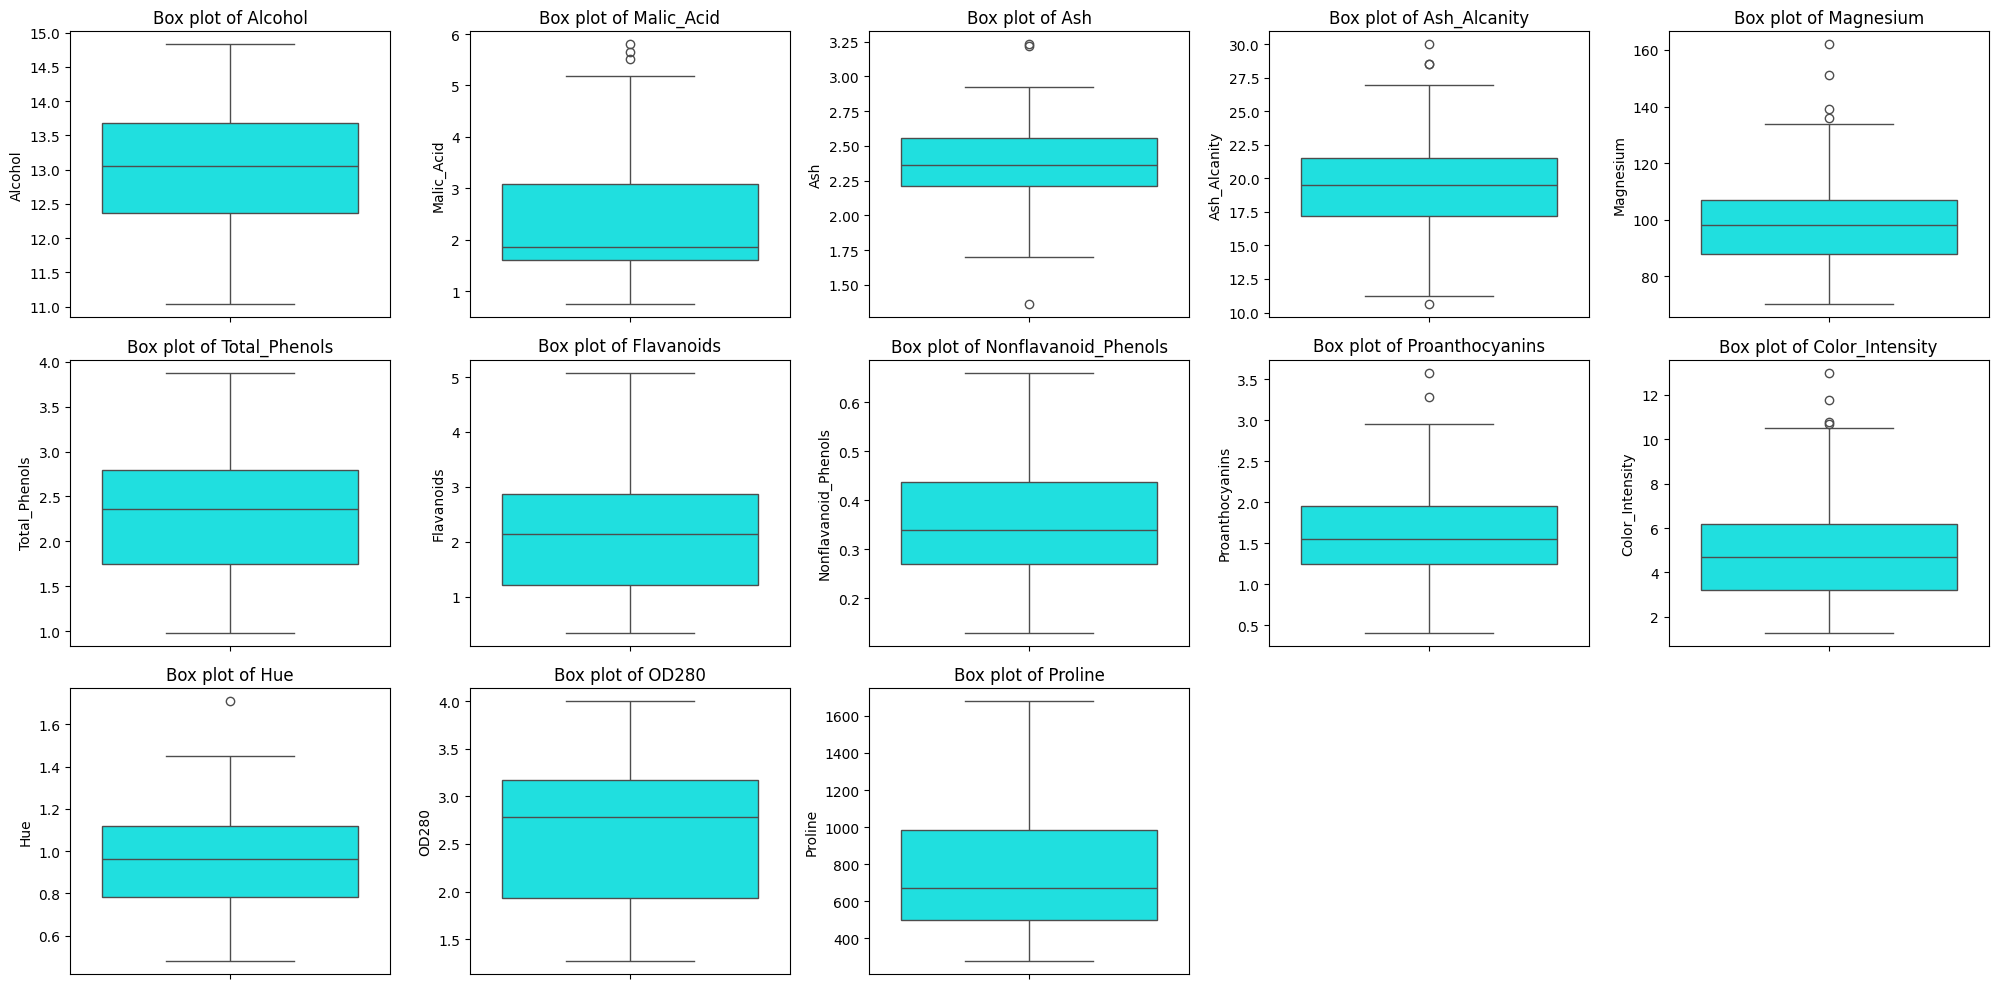

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plotting boxplots for each numerical column
boxplot_color = 'cyan'
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 5, i+1)  # Adjust the grid dimensions (3x4) based on your number of columns
    sns.boxplot(y=df[col] , color=boxplot_color)
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

In [10]:
# Check outlier by counting
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Counting outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), outliers

# List of columns to check for outliers
columns_to_check = ['Alcohol','Malic_Acid',	'Ash',	'Ash_Alcanity',	'Magnesium',	'Total_Phenols',	'Flavanoids',	'Nonflavanoid_Phenols',	'Proanthocyanins',	'Color_Intensity',	'Hue',	'OD280',	'Proline']
# Dictionary to store the count of outliers for each column
outlier_counts = {}

# Counting outliers in each column
for col in columns_to_check:
    count, _ = count_outliers(df, col)
    outlier_counts[col] = count

# Print the count of outliers for each column
for col, count in outlier_counts.items():
    print(f'Number of outliers in {col}: {count}')


Number of outliers in Alcohol: 0
Number of outliers in Malic_Acid: 3
Number of outliers in Ash: 3
Number of outliers in Ash_Alcanity: 4
Number of outliers in Magnesium: 4
Number of outliers in Total_Phenols: 0
Number of outliers in Flavanoids: 0
Number of outliers in Nonflavanoid_Phenols: 0
Number of outliers in Proanthocyanins: 2
Number of outliers in Color_Intensity: 4
Number of outliers in Hue: 1
Number of outliers in OD280: 0
Number of outliers in Proline: 0


In [11]:
# Scalling the dataset
df = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Elbow method

In [12]:
# Apply the Elbow Method to find the optimal number of clusters
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

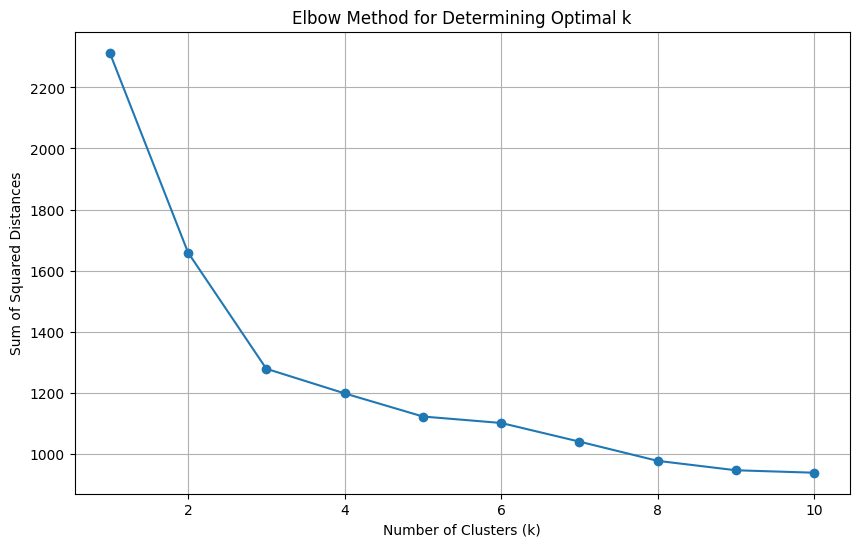

In [13]:
# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Determining Optimal k')
plt.grid(True)
plt.show()

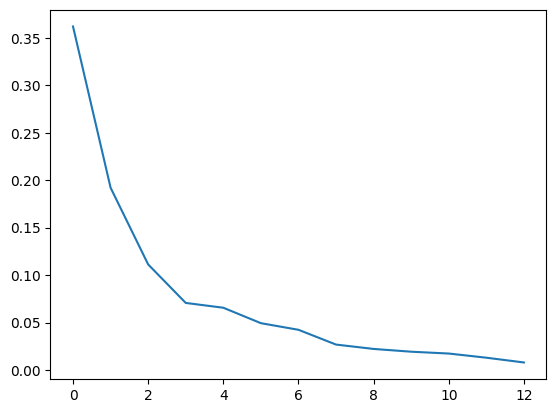

In [14]:
# Using PCA to find contributing variables to the variance
# As we can see, only 2 variables contribute the most, that is "Alcohol" and "Malic_Acid"
pca = PCA()
df_tf = pca.fit_transform(df)
plt.plot(pca.explained_variance_ratio_)

<Axes: >

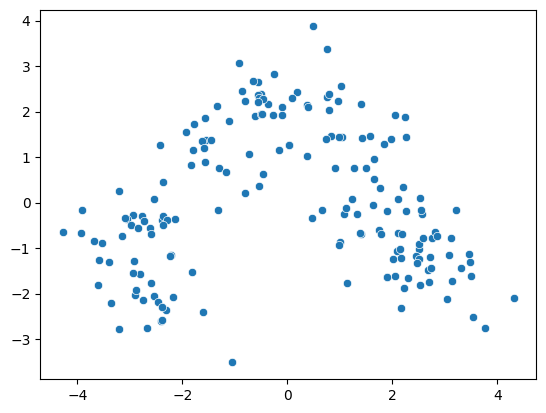

In [15]:
# Plotting our transformed dataset gives us 3 clusters as seen below
sns.scatterplot(
    x = df_tf[:, 0],
    y = df_tf[:, 1])


In [16]:
# Converting the data type into Data Frame for further analysis
df_new = pd.DataFrame(df_tf)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [17]:
# Getting the first and second columns corresponding to the contributing variables`
df_new = pd.DataFrame(df_new.iloc[:,0:2])
df_new.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [18]:
# Renaming the columns for clarity
df_new.columns = ["Alcohol", "Malic_Acid"]

df_new.head()

,Alcohol,Malic_Acid
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


### KMeans clustering

In [19]:
# Using KMeans for clustering
km = KMeans(
    n_clusters = 3,
    init = "k-means++",
    n_init = 10)
km.fit(df_new)
df_new["Clusters"] = km.labels_

<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

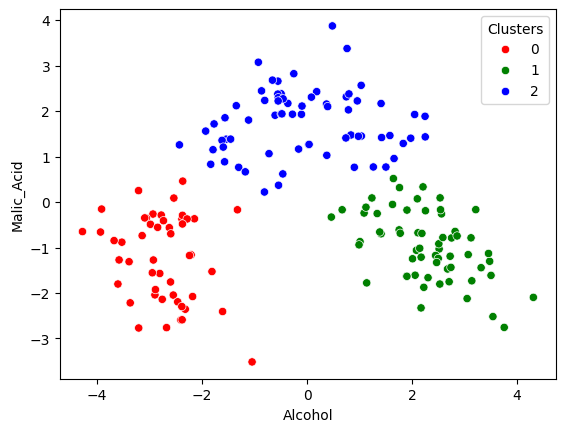

In [20]:
# Visualizing the data
sns.scatterplot(
    x = df_new["Alcohol"],
    y = df_new["Malic_Acid"],
    hue = df_new['Clusters'],
    palette = ["red" , "green" , "blue"])

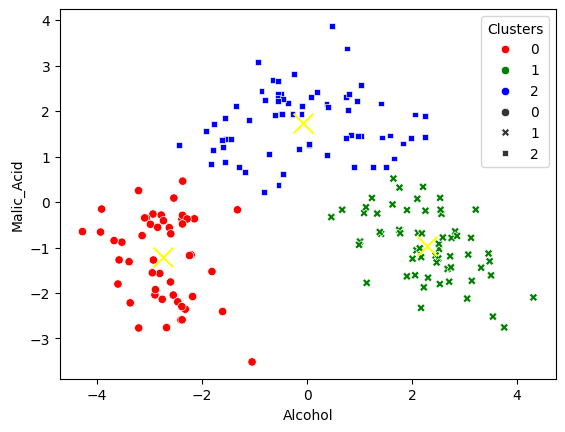

In [21]:
# There are 3 Clusters seen separated clearly
sns.scatterplot(
    x = df_new["Alcohol"],
    y = df_new["Malic_Acid"],
    hue = df_new["Clusters"],
    style = km.labels_,
    palette = ["red", "green", "blue"])

plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker = "x",
    s = 200,
    c = "yellow")

In [22]:
columns_to_cluster = ['Alcohol','Malic_Acid',	'Ash',	'Ash_Alcanity',	'Magnesium',	'Total_Phenols',	'Flavanoids',	'Nonflavanoid_Phenols',	'Proanthocyanins',	'Color_Intensity',	'Hue',	'OD280',	'Proline']
# Extracting the selected columns for clustering
X = df[columns_to_cluster]
# Instantiate KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit KMeans and predict cluster labels
df['Cluster'] = kmeans.fit_predict(X)
# Print the counts of each cluster
print(df['Cluster'].value_counts())

Cluster
0    65
2    62
1    51
Name: count, dtype: int64


# Let try with K = 2

In [23]:
# Using KMeans for clustering
km = KMeans(
    n_clusters = 2,
    init = "k-means++",
    n_init = 10)
km.fit(df_new)
df_new["Clusters"] = km.labels_

<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

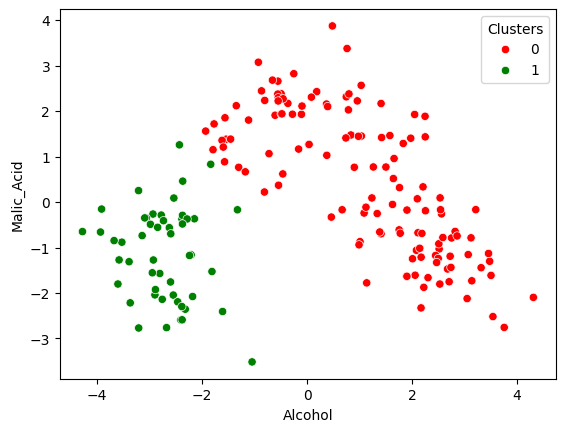

In [24]:
# Visualizing the data
sns.scatterplot(
    x = df_new["Alcohol"],
    y = df_new["Malic_Acid"],
    hue = df_new['Clusters'],
    palette = ["red" , "green"])

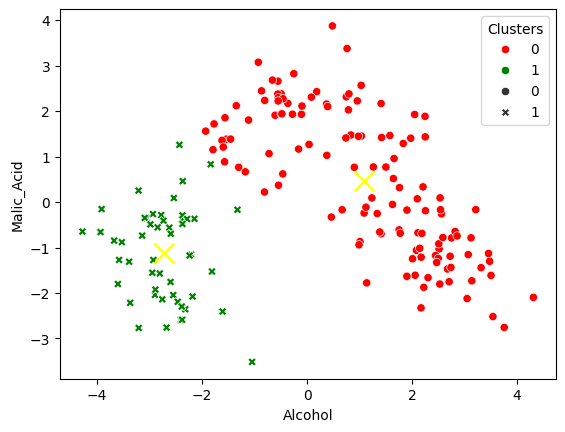

In [25]:
# There are 3 Clusters seen separated clearly
sns.scatterplot(
    x = df_new["Alcohol"],
    y = df_new["Malic_Acid"],
    hue = df_new["Clusters"],
    style = km.labels_,
    palette = ["red", "green"])

plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker = "x",
    s = 200,
    c = "yellow")

In [26]:
columns_to_cluster = ['Alcohol','Malic_Acid',	'Ash',	'Ash_Alcanity',	'Magnesium',	'Total_Phenols',	'Flavanoids',	'Nonflavanoid_Phenols',	'Proanthocyanins',	'Color_Intensity',	'Hue',	'OD280',	'Proline']
# Extracting the selected columns for clustering
X = df[columns_to_cluster]
# Instantiate KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
# Fit KMeans and predict cluster labels
df['Cluster'] = kmeans.fit_predict(X)
# Print the counts of each cluster
print(df['Cluster'].value_counts())

Cluster
0    107
1     71
Name: count, dtype: int64


# Let try with K = 4

In [27]:
# Using KMeans for clustering
km = KMeans(
    n_clusters = 4,
    init = "k-means++",
    n_init = 10)
km.fit(df_new)
df_new["Clusters"] = km.labels_

<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

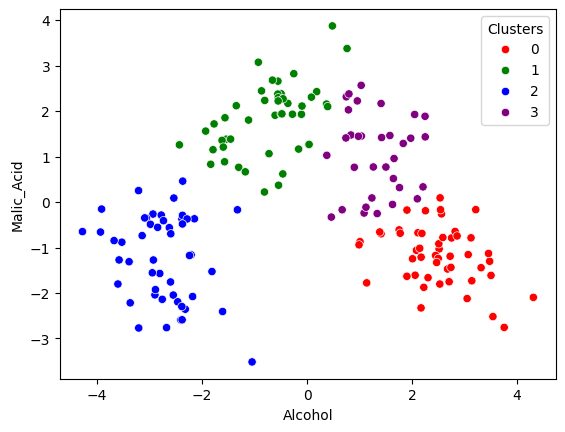

In [28]:
# Visualizing the data
sns.scatterplot(
    x = df_new["Alcohol"],
    y = df_new["Malic_Acid"],
    hue = df_new['Clusters'],
    palette = ["red" , "green","blue","purple"])

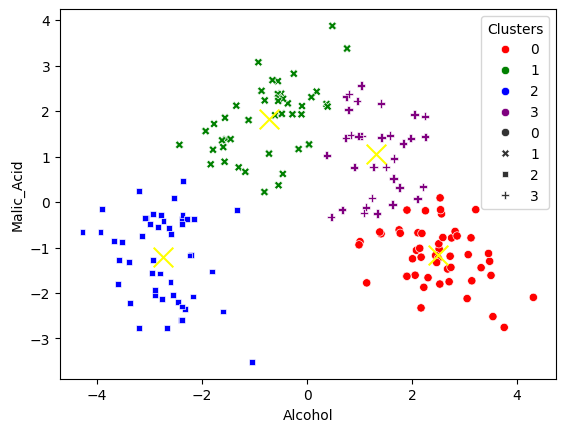

In [29]:
# There are 3 Clusters seen separated clearly
sns.scatterplot(
    x = df_new["Alcohol"],
    y = df_new["Malic_Acid"],
    hue = df_new["Clusters"],
    style = km.labels_,
    palette = ["red", "green","blue","purple"])

plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker = "x",
    s = 200,
    c = "yellow")

In [30]:
columns_to_cluster = ['Alcohol','Malic_Acid',	'Ash',	'Ash_Alcanity',	'Magnesium',	'Total_Phenols',	'Flavanoids',	'Nonflavanoid_Phenols',	'Proanthocyanins',	'Color_Intensity',	'Hue',	'OD280',	'Proline']
# Extracting the selected columns for clustering
X = df[columns_to_cluster]
# Instantiate KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
# Fit KMeans and predict cluster labels
df['Cluster'] = kmeans.fit_predict(X)
# Print the counts of each cluster
print(df['Cluster'].value_counts())

Cluster
2    58
3    58
1    51
0    11
Name: count, dtype: int64
